## Analysing the relationship between health and green space availability 
- Green space availability in each borough is indicated by the percentage of green space to the total land area. 
- Indicators for physical health are: numbers of mortality, overwieght problem, and life expectancy of males and females.
- Indicators for mental health are: neurotic disorder, phobias, depressive episode, anxieity depression. 
- Indicators for mental health are taken as a number of cases per 1000 people in each borough

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.metrics import mean_squared_error, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

import statsmodels
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import spearmanr, pearsonr
from sklearn.metrics import auc

In [3]:
df = pd.read_csv('/Users/wingkaho/Documents/CASA/QM/qm_groupwork/data/datasource_updated.csv')

In [4]:
df.columns

Index(['borough_name', 'borough_code', 'borough_area_hectare',
       'green_area_hectare', 'blue _area_hectare', 'green+blue_area_hectare',
       'percent_green', 'percent_blue', 'percent_green+blue', 'healthyweight',
       'overweight', 'happiness', 'anxiety', 'population', 'death_persons',
       'death_males', 'death_females', 'standard_mortality_ratio_persons',
       'standard_mortality_ratio_males', 'standard_mortality_ratio_females',
       'life_expectancy_birth_males', 'life_expectancy_birth_females',
       'life_expectancy_65_males', 'life_expectancy_65_females',
       'DSR_annual_age15+_persons', 'DSR_annual_age15+_males',
       'DSR_annual_age15+_females', 'number_annual_age15+_persons',
       'number_annual_age15+_males', 'number_annual_age15+_females',
       'meanpercent_homes_with_good_access',
       'meanpercent_home_with_deficiency_access',
       'any_neurotic_disorder_per1000', 'all_phobias_per1000',
       'depressive_episode_per1000', 'generalised_anxiety_

In [5]:
df['population'] = df['population'].str.replace(',', '').astype(float)

### Simple regression model for physcial health 

** Using death persons

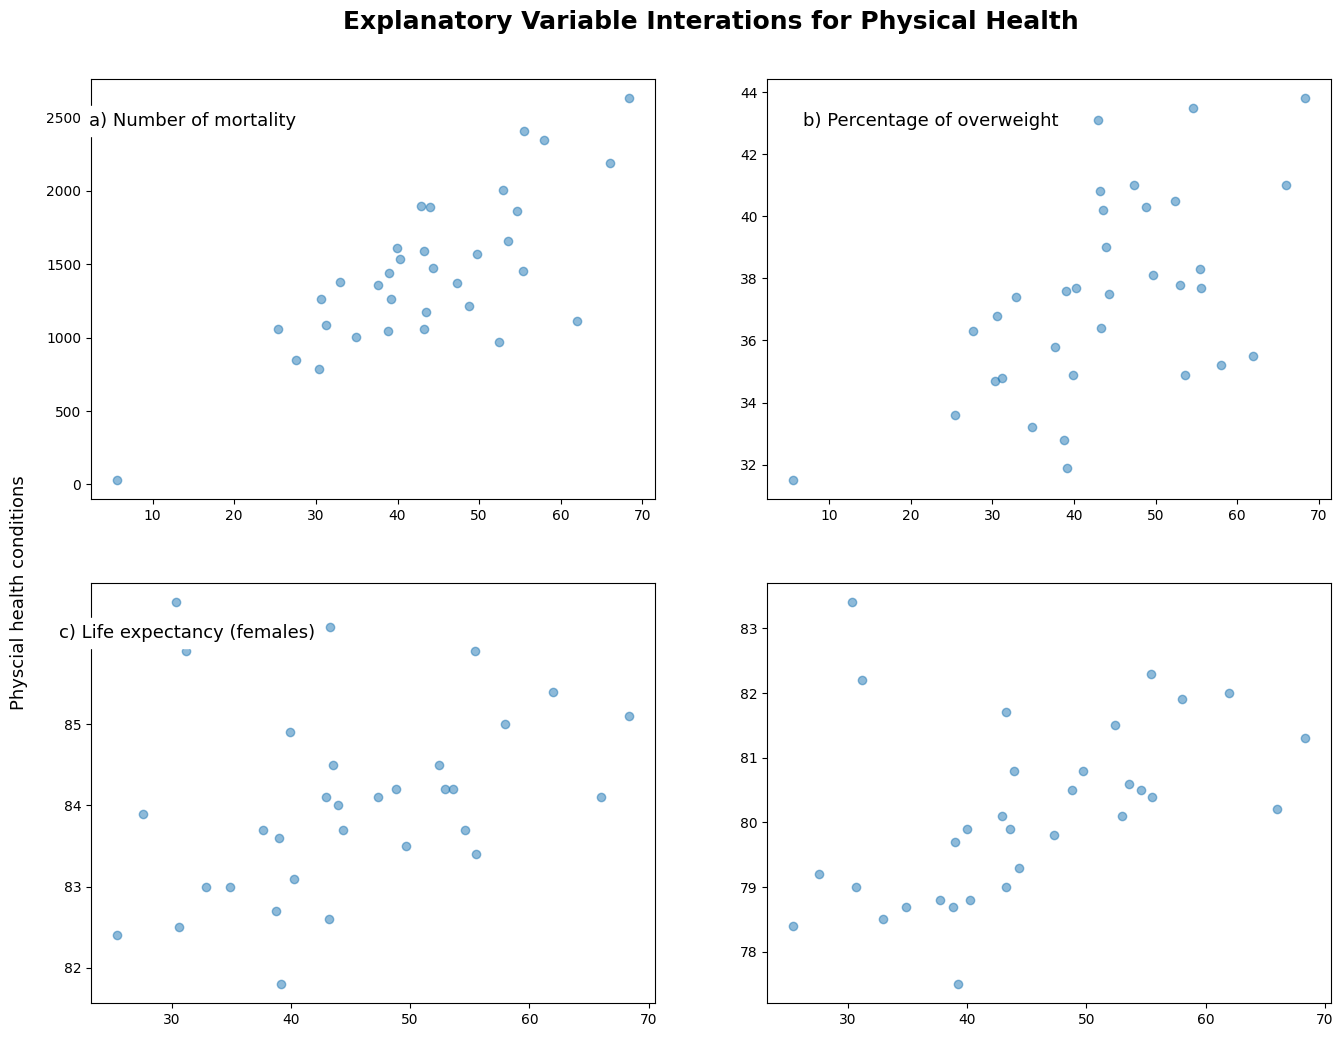

In [24]:
fig, axs = plt.subplots(2, 2, figsize=(16,12))

axs[0,0].scatter(x=df['percent_green'], 
            y=df['death_persons'],
            alpha = 0.5)
axs[0,0].set_title("a) Number of mortality", y=0.87, x=0.18, backgroundcolor = "white", fontsize=13)

axs[0,1].scatter(x=df['percent_green'], 
            y=df['overweight'],
            alpha = 0.5)
axs[0,1].set_title("b) Percentage of overweight", y=0.87, x=0.29, backgroundcolor = "white", fontsize=13)

axs[1,0].scatter(x=df['percent_green'], 
            y=df['life_expectancy_birth_females'],
            alpha = 0.5)
axs[1,0].set_title("c) Life expectancy (females)", y=0.85, x=0.17, backgroundcolor = "white", fontsize=13)

axs[1,1].scatter(x=df['percent_green'], 
            y=df['life_expectancy_birth_males'],
            alpha = 0.5)
axs[1,1].set_title("d) Life expectancy (males)",y=0.85, x=0.17, backgroundcolor = "white", fontsize=13)


plt.title("Explanatory Variable Interations for Physical Health", fontweight="bold", y=2.3,x=-0.1, fontsize=18)
plt.suptitle("Physcial health conditions", rotation=90, y=0.55, x=0.08, fontsize=13)

plt.tight_layout
plt.show()

** Using standard mortality ratio

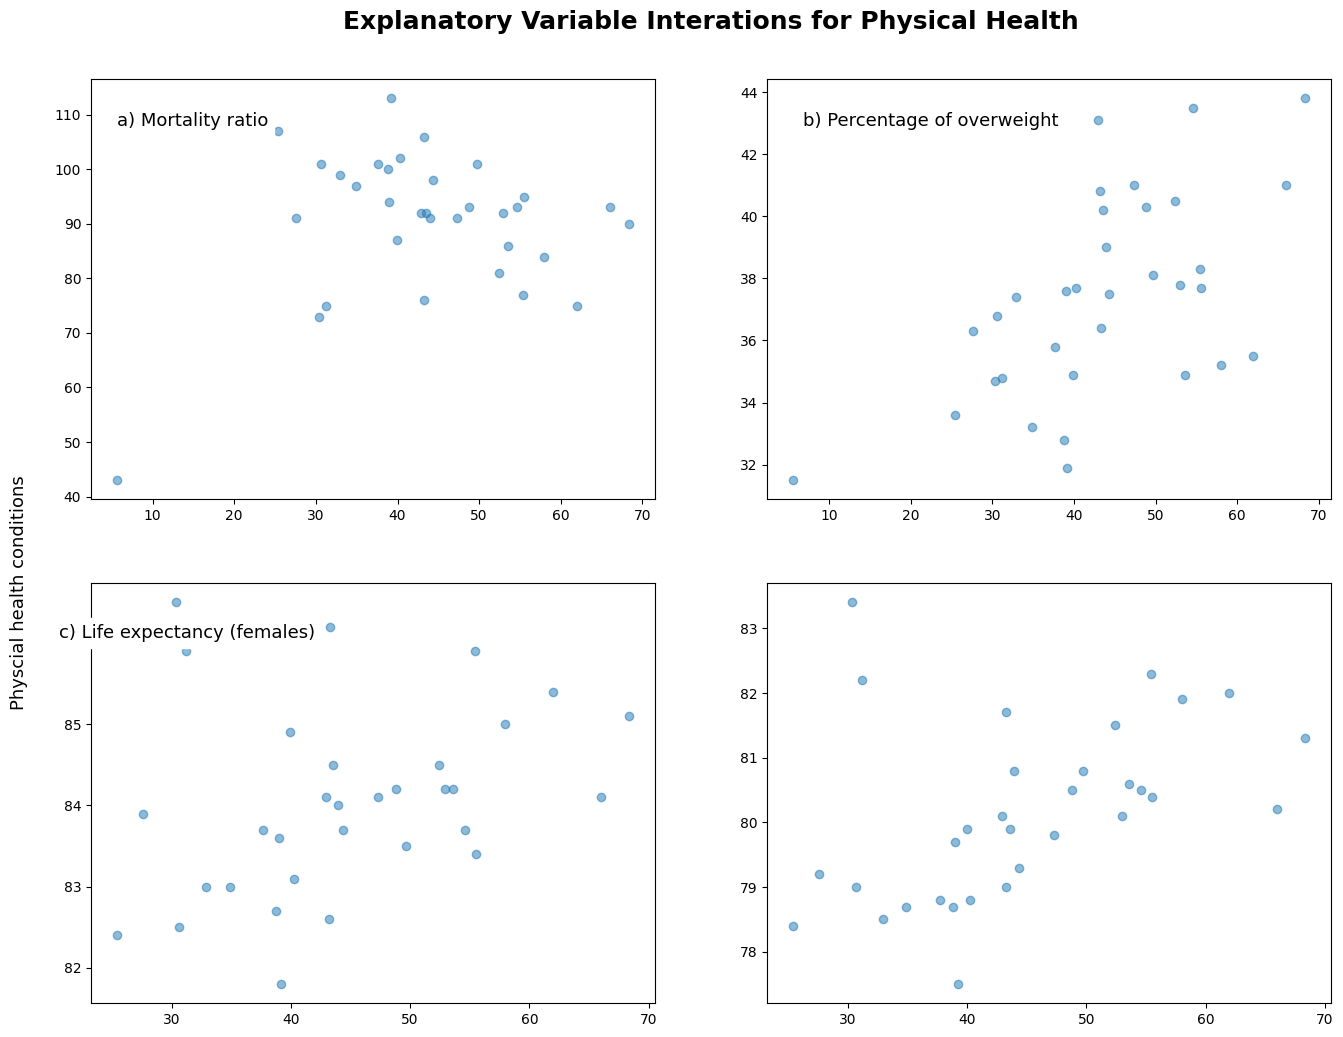

In [25]:
fig, axs = plt.subplots(2, 2, figsize=(16,12))

axs[0,0].scatter(x=df['percent_green'], 
            y=df['standard_mortality_ratio_persons'],
            alpha = 0.5)
axs[0,0].set_title("a) Mortality ratio", y=0.87, x=0.18, backgroundcolor = "white", fontsize=13)

axs[0,1].scatter(x=df['percent_green'], 
            y=df['overweight'],
            alpha = 0.5)
axs[0,1].set_title("b) Percentage of overweight", y=0.87, x=0.29, backgroundcolor = "white", fontsize=13)

axs[1,0].scatter(x=df['percent_green'], 
            y=df['life_expectancy_birth_females'],
            alpha = 0.5)
axs[1,0].set_title("c) Life expectancy (females)", y=0.85, x=0.17, backgroundcolor = "white", fontsize=13)

axs[1,1].scatter(x=df['percent_green'], 
            y=df['life_expectancy_birth_males'],
            alpha = 0.5)
axs[1, 1].set_title("d) Life expectancy (males)", y=0.85, x=0.17, backgroundcolor="white", fontsize=13)


plt.title("Explanatory Variable Interations for Physical Health", fontweight="bold", y=2.3,x=-0.1, fontsize=18)
plt.suptitle("Physcial health conditions", rotation=90, y=0.55, x=0.08, fontsize=13)

plt.tight_layout
plt.show()

### Simple regression model for mental health 

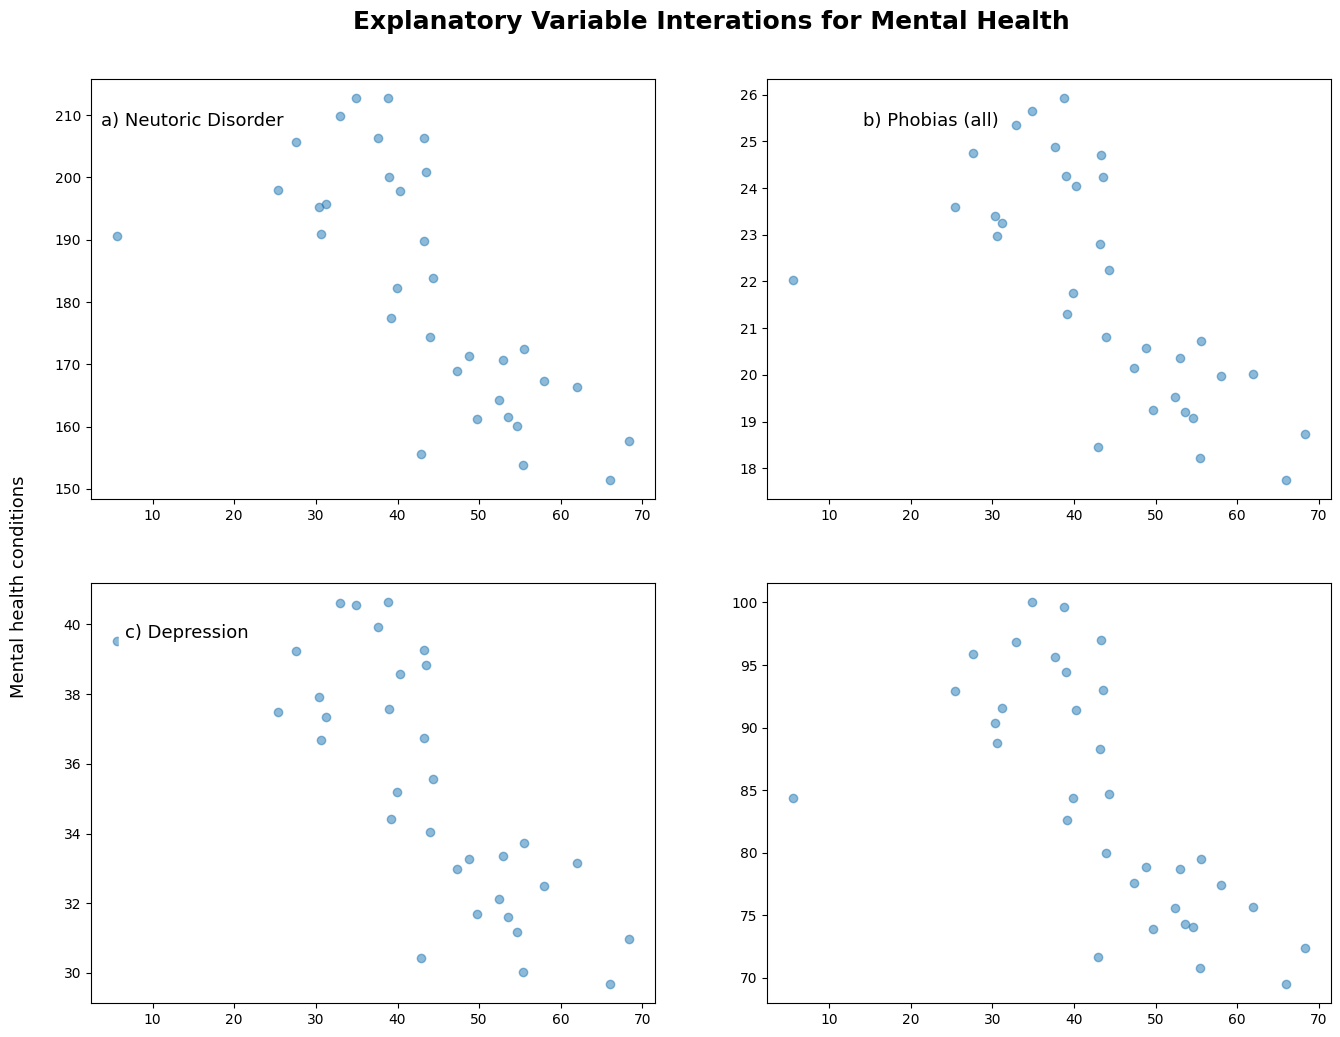

In [26]:
fig, axs = plt.subplots(2, 2, figsize=(16,12))

axs[0,0].scatter(x=df['percent_green'], 
            y=df['any_neurotic_disorder_per1000'],
            alpha = 0.5)
axs[0,0].set_title("a) Neutoric Disorder", y=0.87, x=0.18, backgroundcolor = "white", fontsize=13)

axs[0,1].scatter(x=df['percent_green'], 
            y=df['all_phobias_per1000'],
            alpha = 0.5)
axs[0,1].set_title("b) Phobias (all)", y=0.87, x=0.29, backgroundcolor = "white", fontsize=13)

axs[1,0].scatter(x=df['percent_green'], 
            y=df['depressive_episode_per1000'],
            alpha = 0.5)
axs[1,0].set_title("c) Depression", y=0.85, x=0.17, backgroundcolor = "white", fontsize=13)

axs[1,1].scatter(x=df['percent_green'], 
            y=df['mixed_anxiety_depression'],
            alpha = 0.5)
axs[1, 1].set_title("d) Anxiety", y=0.85, x=0.17, backgroundcolor="white", fontsize=13)


plt.title("Explanatory Variable Interations for Mental Health", fontweight="bold", y=2.3,x=-0.1, fontsize=18)
plt.suptitle("Mental health conditions", rotation=90, y=0.55, x=0.08, fontsize=13)

plt.tight_layout
plt.show()

## Correlation matrix

First:
- converting string to float for death persons
- calculate green space per person and adding new columns for those data

In [19]:
df['death_persons'] = df['death_persons'].str.replace(',', '').astype(float)

In [20]:
df['green_pp'] = df['green_area_hectare']/df['population']

In [22]:
df1 = df[['percent_green', 'green_pp', 'meanpercent_homes_with_good_access', 'life_expectancy_birth_males', 'life_expectancy_birth_females', 'standard_mortality_ratio_persons', 'overweight', 'all_phobias_per1000', 'any_neurotic_disorder_per1000', 'depressive_episode_per1000' , 'mixed_anxiety_depression']]

Plotting up correlation matrix

Text(0.5, 1.0, 'Correlation Matrix')

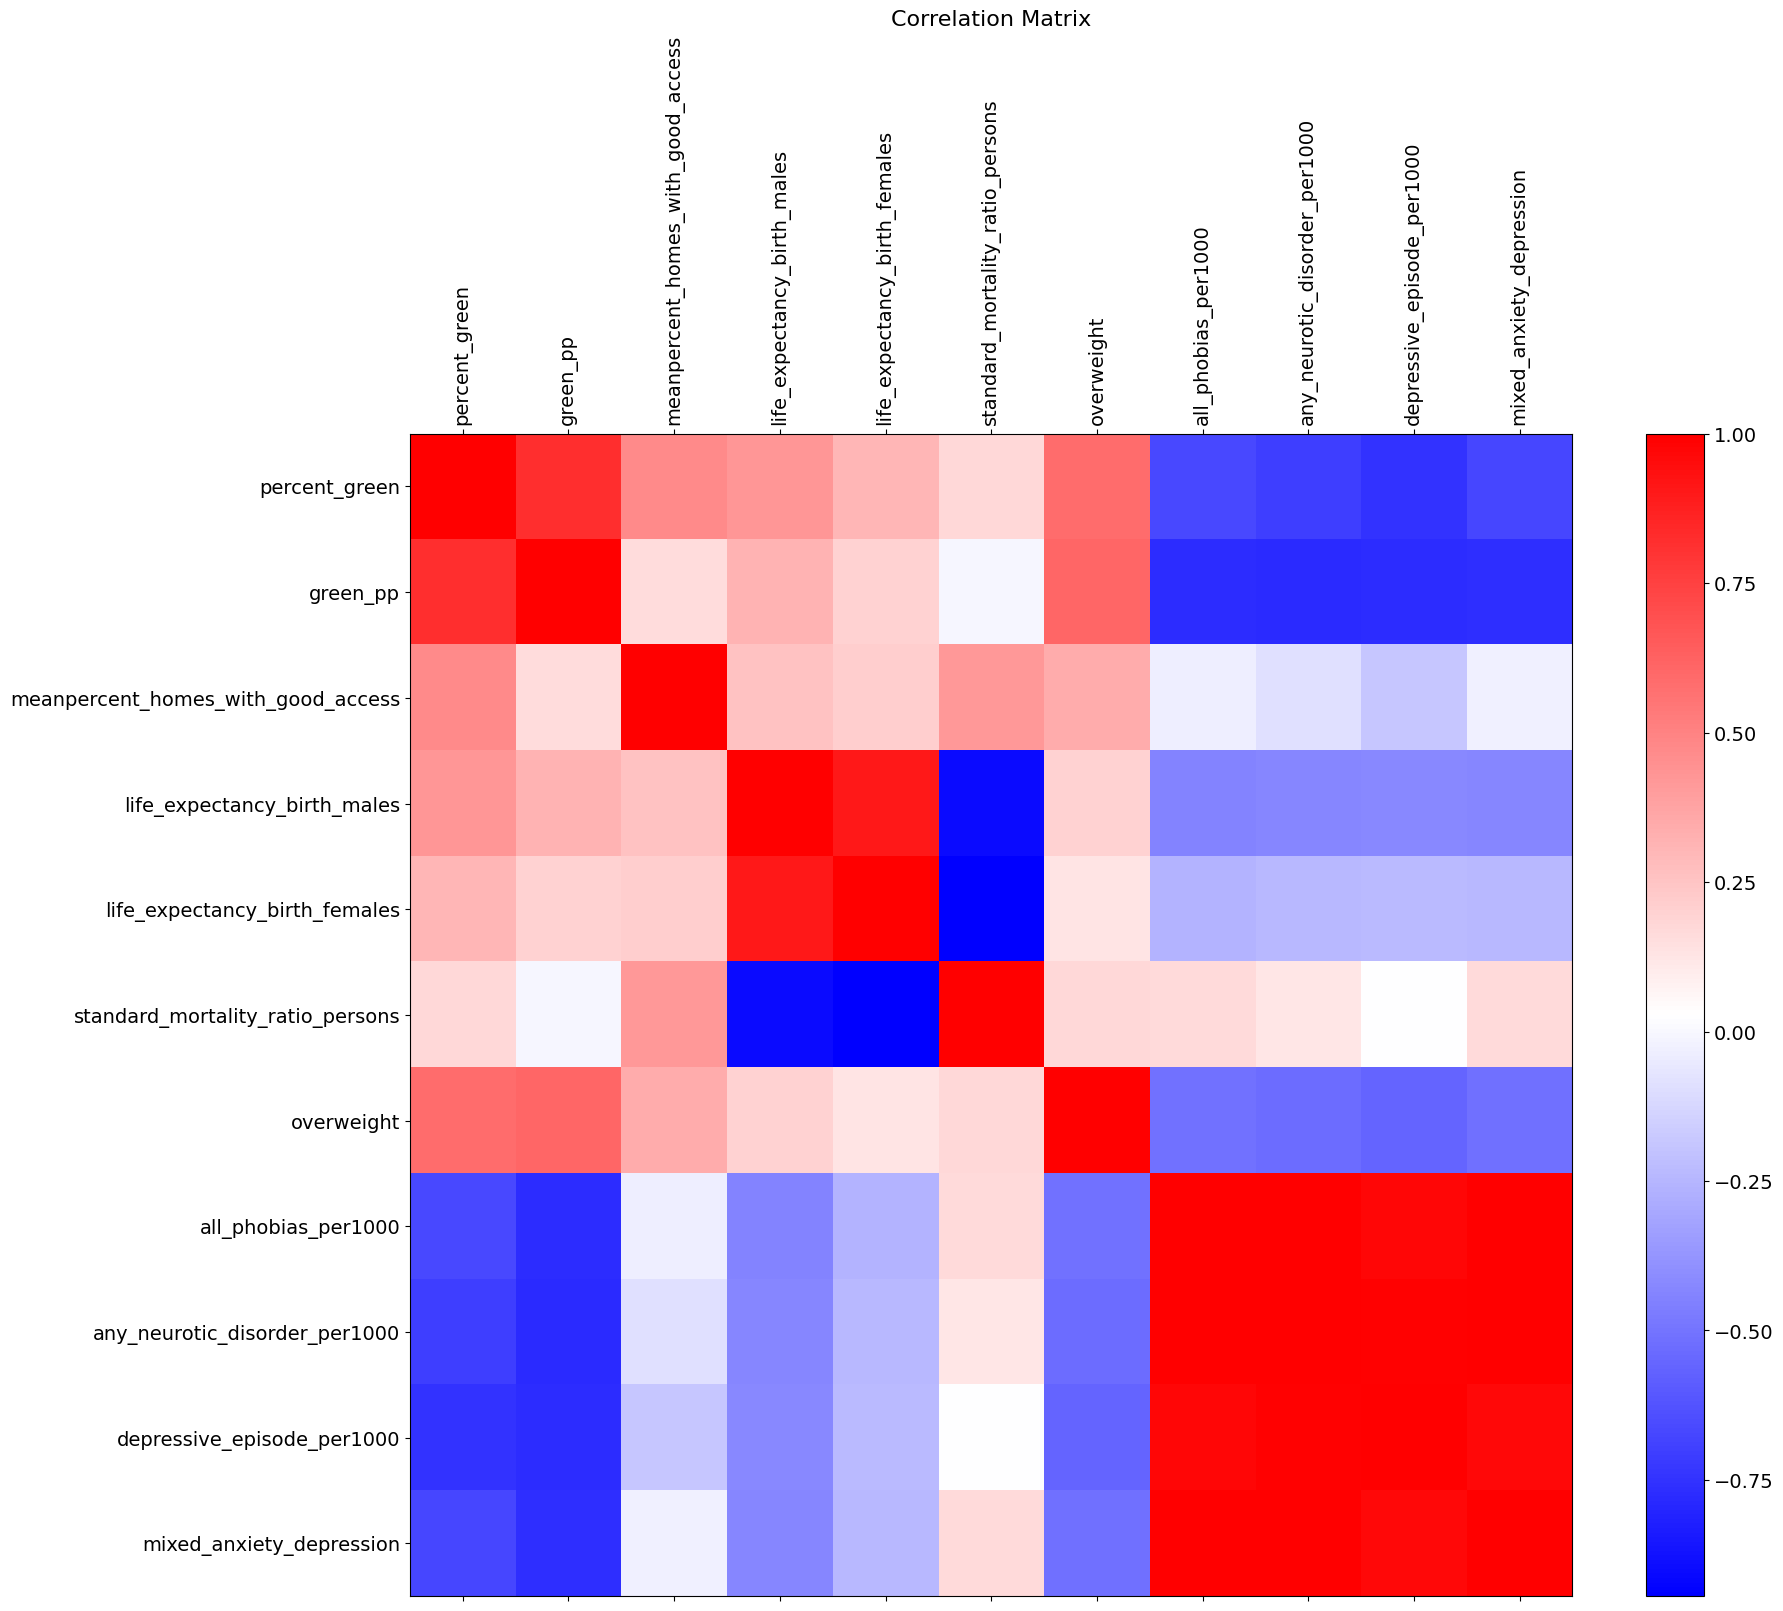

In [23]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df1.corr(), fignum=f.number, cmap="bwr")
plt.xticks(range(df1.shape[1]), df1.columns, fontsize=14, rotation=90)
plt.yticks(range(df1.shape[1]), df1.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)